 # IMDB Movie dataset and predicting the rating of movie (IMDB score) 

1. [Overview](#overview)  
2. [Data Exploration](#dataexplore)
    
    2.1 [Loading Data](#loading)
    
    2.2 [Data Cleaning](#cleaning)
    
3. [Distribution of numeric variable](#distribution)
4. [Feature Selection](#feature)
5. [Splitting Data into Train and Test](#traintest)
6. [Variance and Bias](#varbias)
7. [Confusion Matrix](#confusion)
8. [Assignment QAs](#assign)

<a id='overview'></a>

### Overview:


To have a commerically successful movie, a lot of factors can be considered varying from actor/director involved in making the film or a high budget fast paced movie to a well written script that keeps the audience engaged throughout but these factors does not necessarily have a high score in IMDB(Internet Movie Database). 

##### Dataset Description:

The dataset contains 28 variables for 5043 movies, spanning across 10 decades from different countries.“imdb_score” is the target/dependent variable while the other 27 variables are possible predictors.


##### Problem Statement:

In this notebook, we will try to find the predictors/features which will be useful in predicting the IMDB score of a movie and thus helping us to conclude our analysis in listing out the factors responsible for making a commercially successful movie having a high IMDB score.


<a id='dataexplore'></a>

### Data Exploration

<b id='loading'></b>

#### Loading data and defining the independent variables as categorical and numerical


In [152]:
##Importing all the required librariest that would be need and loading the data set

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting`
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing
import seaborn as sns
import scipy.stats
from scipy.stats import *

movie_dataset = pd.read_csv('C:\\DataScience_Mahesh\\movie_metadata.csv', delimiter=',')
movie_dataset.dataframeName = 'movie_metadata.csv'


In [153]:
movie_dataset.shape

(5043, 28)

<a id='dtype'></a>

##### There are 5043 rows and 28 columns. 

#### What are the data types? 
##### There are 12 categorical and 16 numerical data types.



director_name           	Categorical
num_critic_for_reviews  	Numerical
gross                   	Numerical
num_user_for_reviews    	Numerical
imdb_score              	Numerical
num_voted_users         	Numerical
director_facebook_likes 	Numerical
actor_3_facebook_likes  	Numerical
actor_1_facebook_likes  	Numerical
country                 	Categorical
content_rating          	Categorical
title_year              	Numerical
actor_2_facebook_likes  	Numerical
aspect_ratio            	Numerical
movie_title             	Categorical
cast_total_facebook_likes	Numerical
actor_3_name            	Categorical
facenumber_in_poster    	Numerical
plot_keywords           	Categorical
movie_imdb_link         	Categorical
Color                   	Categorical
duration                	Numerical
actor_2_name            	Categorical
genres                  	Categorical
language                	Categorical
budget                  	Numerical
movie_facebook_likes    	Numerical
actor_1_name            	Categorical



<a id='cleaning'></a>

#### Data Cleaning

Dropping duplicates from the dataset and checking for any null values which can be replaced or any columns that can be dropped which would not have any effect on our prediction model.

In [154]:
##Checking if there are any duplicates in the dataset and dropping them

movie_dataset.drop_duplicates(inplace=True)
movie_dataset.shape


(4998, 28)

Now there are 4998 rows and 28 columns in our dataset

In [80]:
##Checking the total number of null values present in the data set and Finding the columns which have null values in the dataset
movie_dataset.isnull().sum()


color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

<a id='missing'></a>

#### Are there missing values?
###### Yes, there are missing values in different columns as listed above. 

Dropping rows having null values and checking the mean of the predictor (imdb_score) to see if that had significant impact.

In [155]:
##Creating a copy of the main dataset and cleaning it:

movie_data=movie_dataset

movie_data = movie_data.dropna(axis = 0, subset = ['director_name'] )
movie_data = movie_data.dropna(axis = 0, subset = ['gross'])
movie_data = movie_data.dropna(axis = 0, subset = ['plot_keywords'])
movie_data = movie_data.dropna(axis = 0, subset = ['budget'])
movie_data = movie_data.dropna(axis = 0, subset = ['num_user_for_reviews'])
movie_data = movie_data.dropna(axis = 0, subset = ['actor_2_name'])
movie_data = movie_data.dropna(axis = 0, subset = ['actor_1_name'])
movie_data = movie_data.dropna(axis = 0, subset = ['actor_3_name'])


In [83]:
movie_data['imdb_score'].describe()

count    3817.000000
mean        6.464972
std         1.053648
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

Mean of the predictor hasn't changed after dropping the rows having null values so there is no need for imputation of those rows. Now, we will check the min, max, mean and median for rest of the numeric variables and assigning a value to discard missing/null values.

In [156]:
##Checking min, max, mean and median for rest of the numeric variables and assigning a value to discard missing/null values.


movie_data.num_critic_for_reviews.min(), movie_data.num_critic_for_reviews.max(), movie_data.num_critic_for_reviews.median(),movie_data.num_critic_for_reviews.mean()
num_critic_for_reviews_median = movie_data['num_critic_for_reviews'].median()
movie_data.num_critic_for_reviews.fillna(num_critic_for_reviews_median, inplace = True)

movie_data.duration.min(), movie_data.duration.max(), movie_data.duration.median(),movie_data.duration.mean()
duration_median=movie_data['duration'].median()
movie_data.duration.fillna(duration_median,inplace=True)

actor_3_facebook_likes_median = movie_data['actor_3_facebook_likes'].median()
movie_data.actor_3_facebook_likes.fillna(actor_3_facebook_likes_median, inplace = True)
movie_data.actor_3_facebook_likes.isnull().sum()

actor_1_facebook_likes_median = movie_data['actor_1_facebook_likes'].median()
movie_data.actor_1_facebook_likes.fillna(actor_1_facebook_likes_median, inplace = True)
movie_data.actor_1_facebook_likes.isnull().sum()

facenumber_in_poster_median = movie_data['facenumber_in_poster'].median()
movie_data.facenumber_in_poster.fillna(facenumber_in_poster_median, inplace = True)
movie_data.facenumber_in_poster.isnull().sum()






0


Filling null values for language and color columns with "English" and "color" values as most of the movies were released after 1990 and were in English so the probability of it being an English color movie is high. The same applies for aspect ratio as well. For content rating column, we will fill the values with "Not Rated" as it would be difficult to analyze the data and assign apt values for it as there are more than 10 unique values for it and are mostly rated either PG-13/PG or R Approved.



In [157]:

movie_data.language.fillna('English', inplace = True)
movie_data.aspect_ratio.fillna('2.35', inplace = True)
movie_data.color.fillna('color', inplace = True)

##For content rating of the movies where the values are not set, we will set it to Not Rated.
movie_data.content_rating.fillna('Not Rated', inplace = True)

In [158]:
movie_data.isnull().sum()

# Now there are no null values in the dataset after cleaning process.

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

<a id='distribution'></a>

### Distribution of the numeric variables

In [87]:
## Analysing IMDB Score 

movie_data['imdb_score'].describe()



count    3817.000000
mean        6.464972
std         1.053648
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

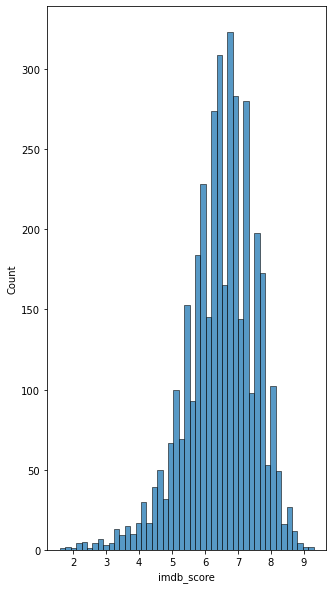

In [88]:
sns.histplot(movie_data['imdb_score']);

In [89]:
##Looks like it is deviating from normal distribution and seems to be left(negative) skewed.

print("Skewness: %f" % movie_data['imdb_score'].skew())
print("Kurtosis: %f" % movie_data['imdb_score'].kurt())

Skewness: -0.725893
Kurtosis: 1.156499


<a id='range'></a>

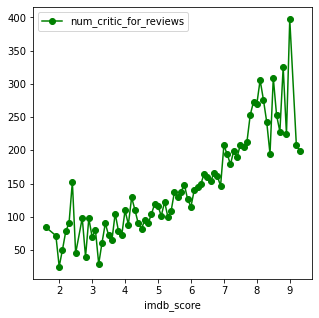

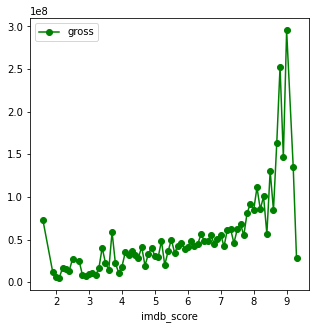

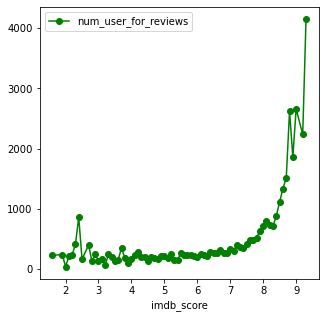

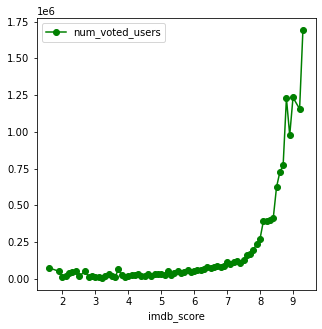

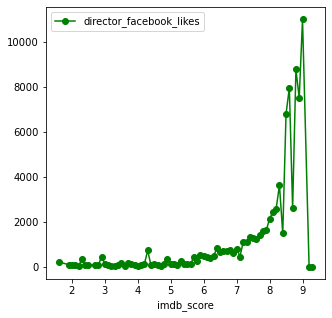

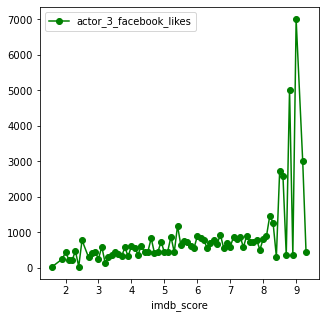

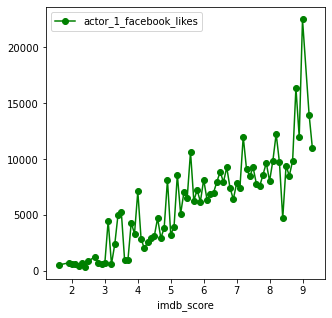

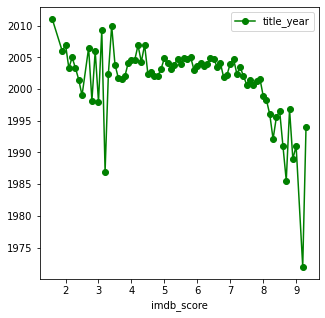

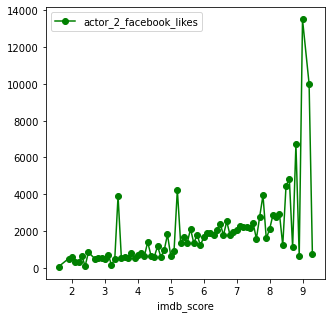

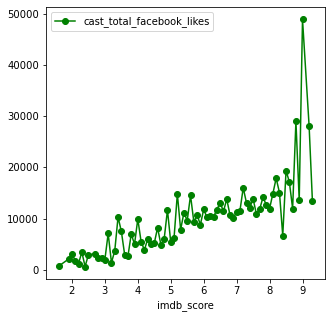

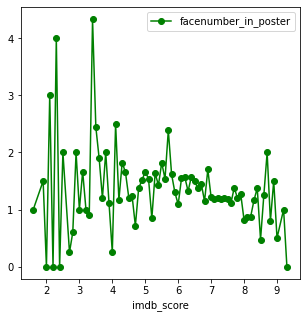

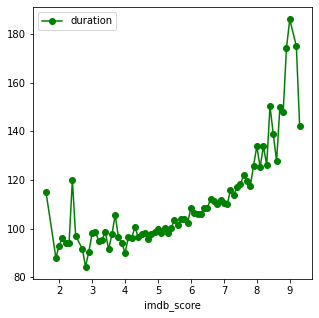

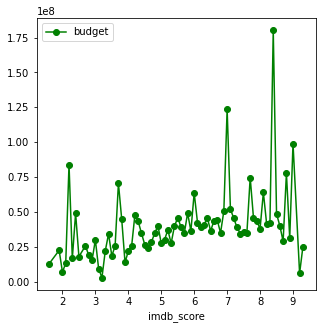

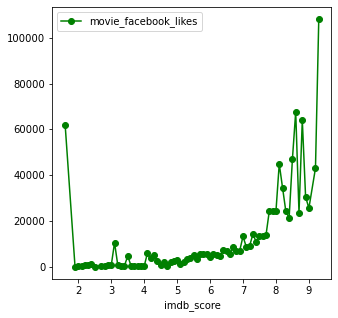

In [90]:


## Checking distribution of independent numeric variables

data=movie_data[['num_critic_for_reviews', 'gross', 'num_user_for_reviews', 'num_voted_users', 'director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','title_year','actor_2_facebook_likes','cast_total_facebook_likes','facenumber_in_poster','duration','budget','movie_facebook_likes']]
for c in data.columns[:]:
    
    axis = movie_data.groupby('imdb_score')[[c]].mean().plot(figsize=(5,5),marker='o',color='g')


#### Looks like it is deviating from normal distribution and most of the independent numeric variables seem to be left(negative) skewed.


<a id=pairplot></a>

### Dependency of predictors

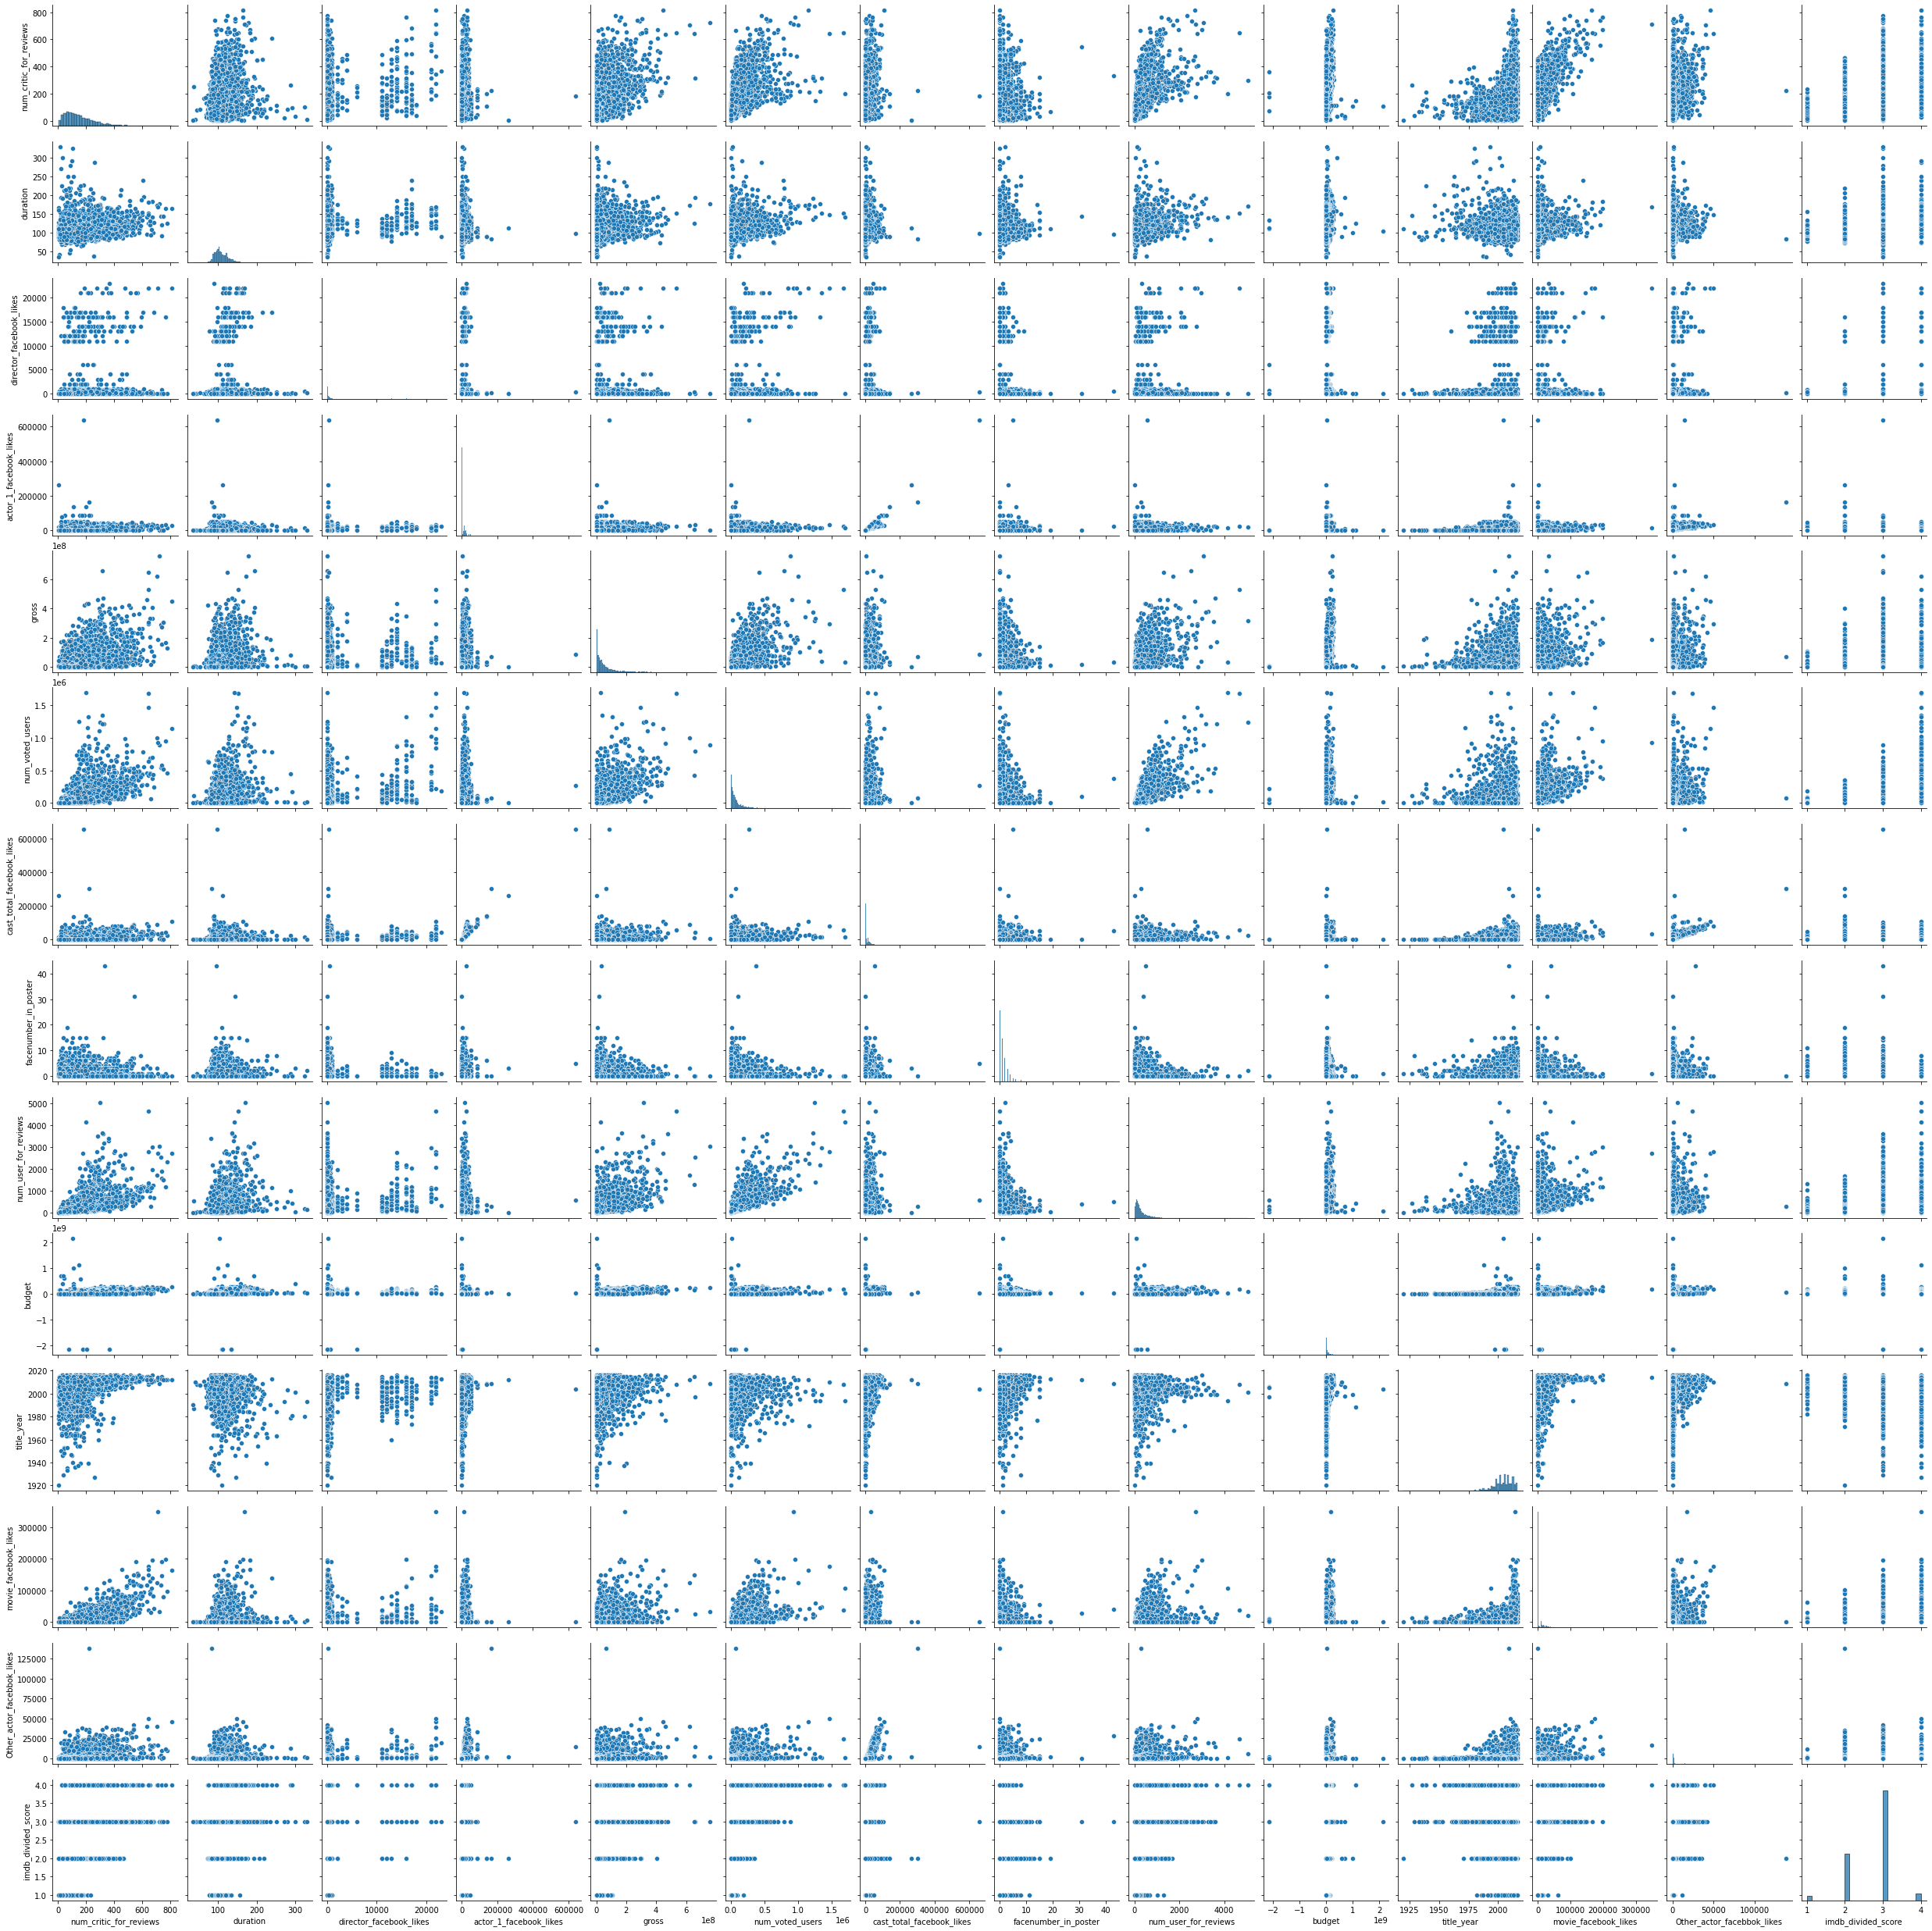

In [232]:
sns.pairplot(movie_data)

<a id='feature'></a>

### Feature Selection

We will 3 different methods for feature selection as mentioned below:
* Correlation matrix
* Univariate selection
* Feature importance property

* Correlation matrix

First, we will create a copy of the dataset and clean the dataset by removing categorical variables from the data which will not have much effect on finalizing the predictors which would be useful to predict the target.

In [34]:
movie_data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [159]:
##Creating a copy of the dataset and cleaning it by removing categorical variables having names of actors/directors
#as values.

movie_ML=movie_data

movie_ML.drop('actor_1_name',axis=1,inplace=True)
movie_ML.drop('actor_2_name',axis=1,inplace=True)
movie_ML.drop('actor_3_name',axis=1,inplace=True)
movie_ML.drop('movie_title',axis=1,inplace=True)
movie_ML.drop('plot_keywords',axis=1,inplace=True)
movie_ML.drop('director_name',axis=1,inplace=True)
movie_ML.drop('genres',axis=1,inplace=True)

In [92]:
movie_data.nunique()

color                           3
num_critic_for_reviews        527
duration                      154
director_facebook_likes       398
actor_3_facebook_likes        883
actor_1_facebook_likes        731
gross                        3730
num_voted_users              3765
cast_total_facebook_likes    3301
facenumber_in_poster           19
movie_imdb_link              3750
num_user_for_reviews          943
language                       38
country                        47
content_rating                 12
budget                        368
title_year                     75
actor_2_facebook_likes        869
imdb_score                     74
aspect_ratio                   19
movie_facebook_likes          688
dtype: int64

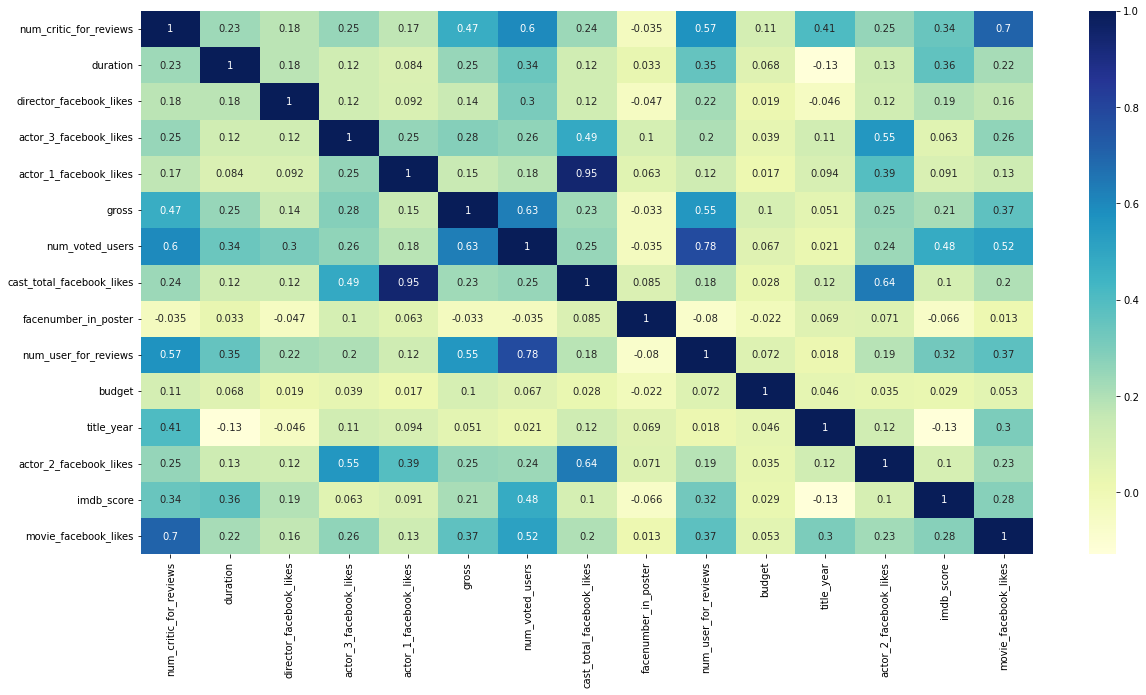

In [160]:
#Performing feature selection using correleation matrix heatmap
#Plotting heat map to see the correlation and check for any possibility of redundant columns 
sns.heatmap(movie_ML .corr(), annot=True, cmap="YlGnBu")
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

#### Actor 1, 2 and 3 facebook likes and cast facebook likes seems to be prediciting the same data so we will use any one of the listed independent variables and merge the other two in a new column.

In [161]:
movie_ML['Other_actor_facebbok_likes']=movie_ML["actor_2_facebook_likes"] + movie_ML['actor_3_facebook_likes']



* Univariate method

Removing extra categorical columns which will not be useful for this method and listing out the top 10 features of this dataset that would be useful for our prediction model.

In [162]:


movie_ML.drop('movie_imdb_link',axis=1,inplace=True)
movie_ML.drop('language',axis=1,inplace=True)
movie_ML.drop('color',axis=1,inplace=True)
movie_ML.drop('aspect_ratio',axis=1,inplace=True)

In [47]:
movie_ML.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,Other_actor_facebbok_likes,imdb_divided_score
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,33000,1791.0,3
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,0,6000.0,3
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,85000,554.0,3
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,164000,46000.0,4
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,24000,1162.0,3


In [163]:
# We need to categorize the imdb values in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively

movie_ML["imdb_divided_score"]=pd.cut(movie_dataset['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [44]:
#dropping imdb score since we have the range column of imdb score for further use.
movie_ML.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Other_actor_facebbok_likes,imdb_divided_score
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,1791.0,3
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,6000.0,3
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,554.0,3
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,46000.0,4
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,1162.0,3


In [164]:
movie_ML.drop('imdb_score',axis=1,inplace=True)

In [165]:
##Using Univariate Selection to list out the top features

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

A=pd.DataFrame(columns=['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','budget','title_year','movie_facebook_likes','Other_actor_facebbok_likes'],data=movie_ML)
B=pd.DataFrame(columns=['imdb_divided_score'],data=movie_ML)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(A,B)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(A.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  

                         Specs         Score
4                        gross  1.708160e+10
7                       budget  3.012367e+09
9         movie_facebook_likes  1.906845e+07
2      director_facebook_likes  2.221056e+06
3       actor_1_facebook_likes  7.093518e+05
10  Other_actor_facebbok_likes  4.395395e+05
6         num_user_for_reviews  2.798905e+05
0       num_critic_for_reviews  3.230605e+04
1                     duration  1.948206e+03
5         facenumber_in_poster  3.665457e+01


From the output of univariate method, the top 10 features are listed below ordinally:

gross  
movie_facebook_likes  
duration  
director_facebook_likes  
num_user_for_reviews  
budget  
num_critic_for_reviews  
facenumber_in_poster  
Other_actor_facebbok_likes  
actor_1_facebook_likes  

* Feature importance property

First of all, we will create a copy of dataset so that categorical variables can be dropped and then convert the data types of all the columns to avoid error for visualizing the data.

In [166]:
#Using feature importance property to visualize the significant features.

#Creating a copy of dataset so that categorical variables can be dropped

FI=movie_ML


FI.drop('country',axis=1,inplace=True)
FI.drop('content_rating',axis=1,inplace=True)

#Converting the data types of all the columns to avoid error for visualizing the data.
FI.iloc[:] = FI.iloc[:].astype(int)


C:\Users\djeth\AppData\Local\Temp\ipykernel_14268\1952444737.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(C,d)


[0.07445408 0.08211552 0.05981895 0.05523853 0.05156146 0.07303855
 0.12335012 0.0539427  0.04541012 0.06855247 0.07646455 0.06870937
 0.05297714 0.06042332 0.05394312]


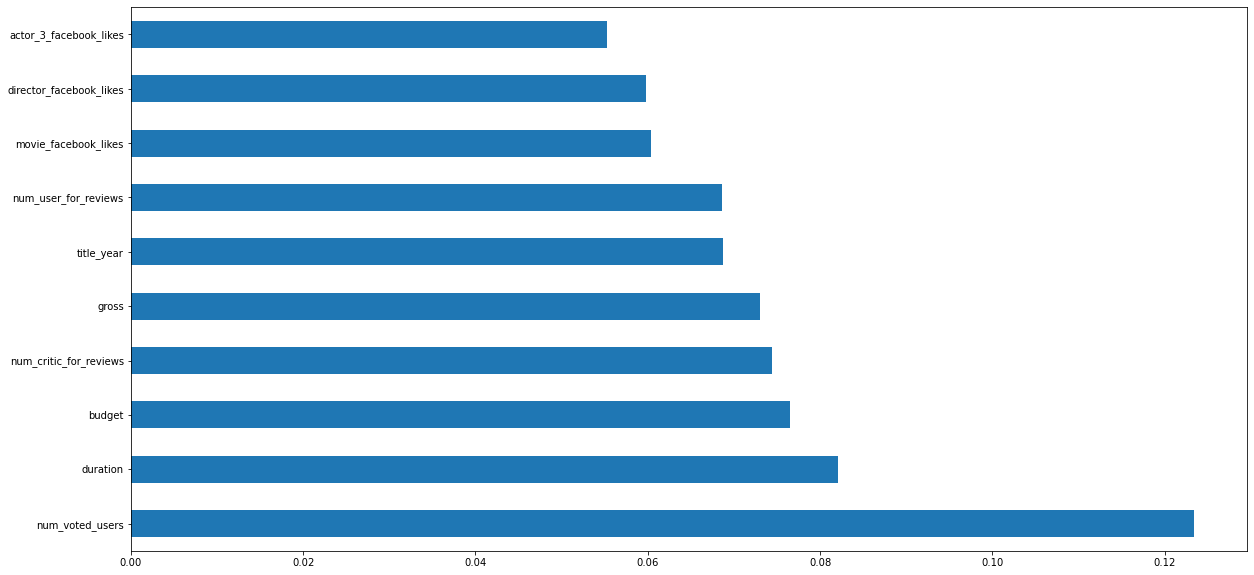

In [167]:

import pandas as pd
import numpy as np

C=FI.loc[:,movie_ML.columns != "imdb_divided_score"]
d=pd.DataFrame(columns=['imdb_divided_score'],data=FI)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(C,d)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=C.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Based on the feature selection methods like Univariate, correleation matrix heatmap and feature imporatance property below are the variables ranked ordinally:
* num_voted_users
* duration
* num_critic_for_reviews
* num_user_for_reviews
* movie_facebook_likes
* gross
* budget
* title_year
* director_facebook_likes

<a id='traintest'></a>

### Splitting data into Training and Test data set

Splitting the dataset into 70-30% and allocating 70% data to Training set and 30% data to test set.


In [103]:
from sklearn.model_selection import  train_test_split

X = movie_ML[['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','budget','title_year','movie_facebook_likes','Other_actor_facebbok_likes']]

y = movie_ML['imdb_divided_score']

#Spliting data into Training 70% and Test set 30%
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)


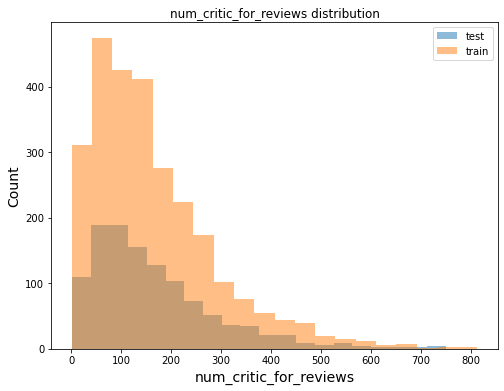

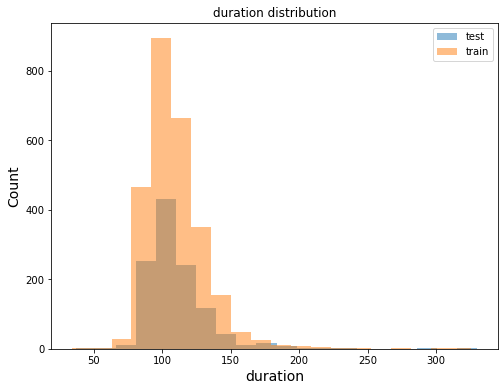

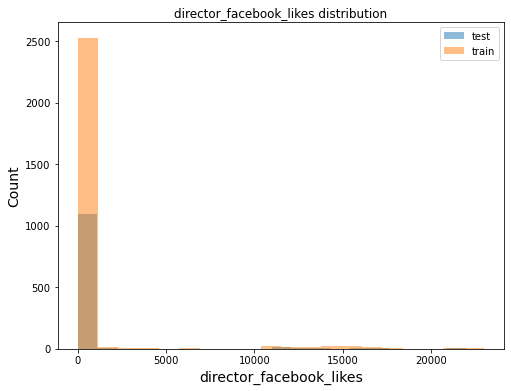

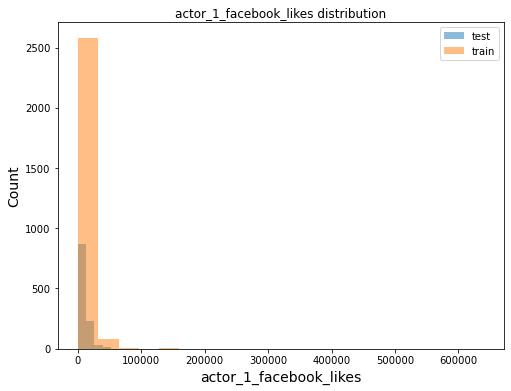

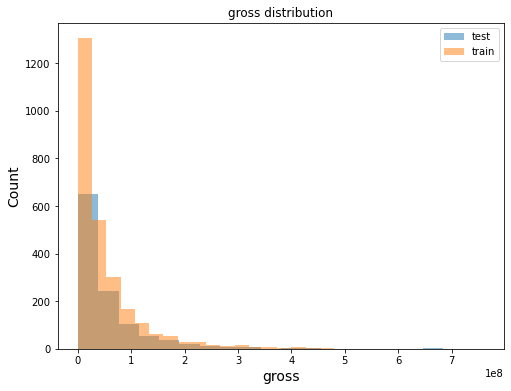

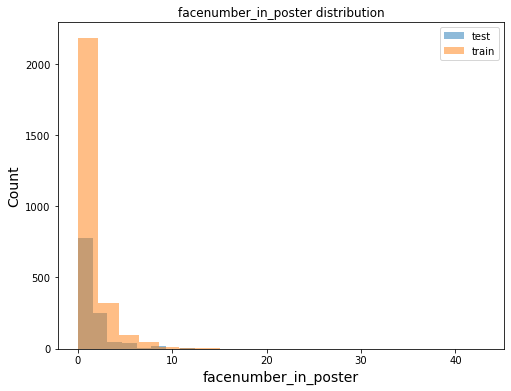

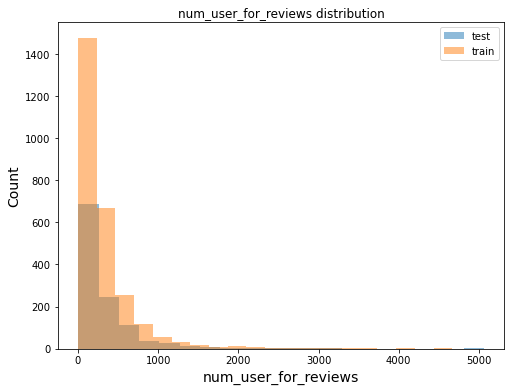

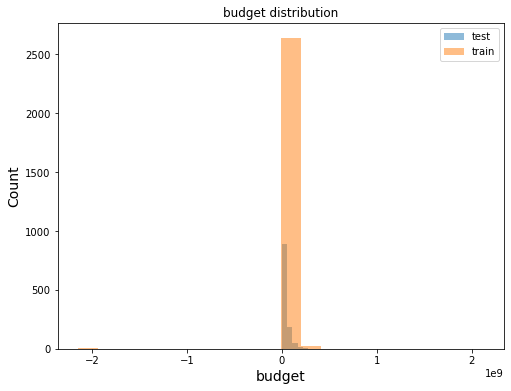

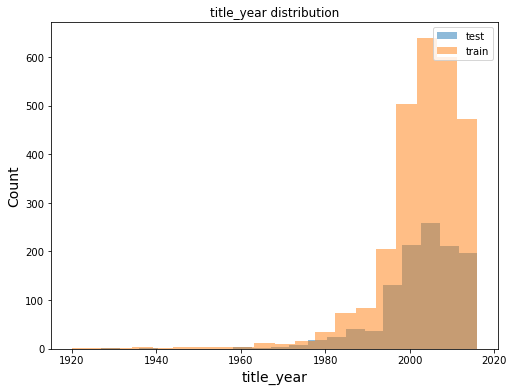

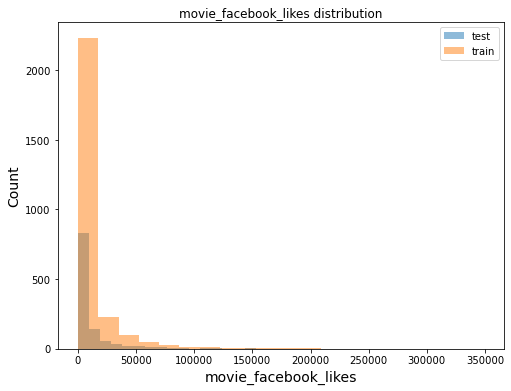

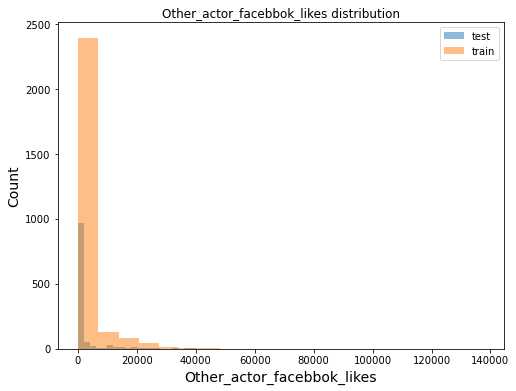

In [104]:
X_test_plot = X_test[['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','budget','title_year','movie_facebook_likes','Other_actor_facebbok_likes']]

X_train_plot = X_train[['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','budget','title_year','movie_facebook_likes','Other_actor_facebbok_likes']]



# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

#### Do the training and test sets have the same data?
###### The division of the dataset in train and test is fine and seems to have more or less the same data.


<a id=varbias></a>

### Variance and Bias

Using linear regression model to calculate variance and bias by splitting the dataset into training and testing and allocating 70% to training dataset and the rest to test.

In [168]:
#Dropping actor_2_facebook_likes and actor_3_facebook_likes as we have already merged both the columns to Other actor facebook likes


movie_ML.drop('actor_2_facebook_likes',axis=1,inplace=True)
movie_ML.drop('actor_3_facebook_likes',axis=1,inplace=True)



In [66]:
movie_ML.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,Other_actor_facebbok_likes,imdb_divided_score
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,33000,1791.0,3
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,0,6000.0,3
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,85000,554.0,3
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,164000,46000.0,4
5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,24000,1162.0,3


In [106]:


from sklearn.model_selection import  train_test_split

E = movie_ML[['cast_total_facebook_likes','num_voted_users','num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','budget','title_year','movie_facebook_likes','Other_actor_facebbok_likes']]

f = movie_ML['imdb_divided_score']

#Spliting data into Training 70% and Test set 30%
E_train, E_test, f_train, f_test=train_test_split(E,f,test_size=0.3,random_state=100)






In [107]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(E_train,f_train)





LinearRegression()

In [110]:
E_train

,cast_total_facebook_likes,num_voted_users,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,Other_actor_facebbok_likes
2705,1873,17261,71,118,41,556,9059588,1,125,15000000,2002,455,737
276,3382,94172,101,84,50,979,140015224,0,179,133000000,1999,0,1578
3087,1807,3665,43,145,0,639,5669081,1,57,10818775,2012,0,657
747,24664,14888,76,98,48,21000,61112916,0,83,50000000,2006,747,1658
1317,1686,28429,224,115,180,1000,10640645,0,110,40000000,2015,0,622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,13619,13455,23,115,0,12000,25842000,0,87,22000000,1993,2000,1266
81,72881,228554,416,132,274,26000,155111815,0,710,170000000,2012,53000,28000
2020,3962,33958,163,114,19,1000,28772222,1,163,105000000,2015,37000,1745
3197,2603,9541,49,97,105,982,2331318,1,64,10000000,2011,0,772


In [111]:
pred=regr.predict(E_test)
variance=np.var(pred)
variance


0.09129433072234407

In [112]:
SSE=np.mean((np.mean(pred) - y) **2)
Bias = SSE - variance
Bias

0.24731056535800866

Using linear regression model, we get the below values for variance and bias:
    
    Variance= 0.09
    Bias= 0.247

<a id='confusion'></a>

### Confusion Matrix


Creating a copy of the dataset to add dummy variables to 10 % of the categorical data and using it to create a confusion matrix.

In [169]:
Dummy_data = movie_ML
Dummy_data

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,Other_actor_facebbok_likes,imdb_divided_score
0,723,178,0,1000,760505847,886204,4834,0,3054,237000000,2009,33000,1791,3
1,302,169,563,40000,309404152,471220,48350,0,1238,300000000,2007,0,6000,3
2,602,148,0,11000,200074175,275868,11700,1,994,245000000,2015,85000,554,3
3,813,164,22000,27000,448130642,1144337,106759,0,2701,250000000,2012,164000,46000,4
5,462,132,475,640,73058679,212204,1873,1,738,263700000,2012,24000,1162,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,143,77,291,291,424760,72639,368,0,371,7000,2004,19000,53,3
5034,35,80,0,0,70071,589,0,0,35,7000,2005,74,0,3
5035,56,81,0,121,2040920,52055,147,0,130,7000,1992,0,26,3
5037,14,95,0,296,4584,1338,690,1,14,9000,2011,413,338,3


In [170]:
Dummy_data.insert(1, "country", movie_dataset['country'])
Dummy_data.insert(1, "content_rating", movie_dataset['content_rating'])

In [171]:
Dummy_data

,num_critic_for_reviews,content_rating,country,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,Other_actor_facebbok_likes,imdb_divided_score
0,723,PG-13,USA,178,0,1000,760505847,886204,4834,0,3054,237000000,2009,33000,1791,3
1,302,PG-13,USA,169,563,40000,309404152,471220,48350,0,1238,300000000,2007,0,6000,3
2,602,PG-13,UK,148,0,11000,200074175,275868,11700,1,994,245000000,2015,85000,554,3
3,813,PG-13,USA,164,22000,27000,448130642,1144337,106759,0,2701,250000000,2012,164000,46000,4
5,462,PG-13,USA,132,475,640,73058679,212204,1873,1,738,263700000,2012,24000,1162,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,143,PG-13,USA,77,291,291,424760,72639,368,0,371,7000,2004,19000,53,3
5034,35,Not Rated,Philippines,80,0,0,70071,589,0,0,35,7000,2005,74,0,3
5035,56,R,USA,81,0,121,2040920,52055,147,0,130,7000,1992,0,26,3
5037,14,Not Rated,USA,95,0,296,4584,1338,690,1,14,9000,2011,413,338,3


In [172]:
##get top 2 values of index
value_counts=movie_dataset['country'].value_counts()
vals = value_counts[:2].index
print (vals)


Index(['USA', 'UK'], dtype='object')


In [173]:
Dummy_data['country'] = Dummy_data.country.where(movie_dataset.country.isin(vals), 'other')
Dummy_data["country"].value_counts()


USA      3023
other     476
UK        318
Name: country, dtype: int64

In [174]:



Dummy_data = pd.get_dummies(data = Dummy_data, columns = ['country'] , prefix = ['country'] , drop_first = True)
Dummy_data = pd.get_dummies(data = Dummy_data, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)



In [175]:
list(Dummy_data.columns)

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'movie_facebook_likes',
 'Other_actor_facebbok_likes',
 'imdb_divided_score',
 'country_USA',
 'country_other',
 'content_rating_G',
 'content_rating_GP',
 'content_rating_M',
 'content_rating_NC-17',
 'content_rating_Not Rated',
 'content_rating_PG',
 'content_rating_PG-13',
 'content_rating_Passed',
 'content_rating_R',
 'content_rating_Unrated',
 'content_rating_X']

In [203]:
Dummy_data = Dummy_data.dropna(axis = 0, subset = ['imdb_divided_score'])

In [204]:
Dummy_data.isnull().sum()

num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_1_facebook_likes        0
gross                         0
num_voted_users               0
cast_total_facebook_likes     0
facenumber_in_poster          0
num_user_for_reviews          0
budget                        0
title_year                    0
movie_facebook_likes          0
Other_actor_facebbok_likes    0
imdb_divided_score            0
country_USA                   0
country_other                 0
content_rating_G              0
content_rating_GP             0
content_rating_M              0
content_rating_NC-17          0
content_rating_Not Rated      0
content_rating_PG             0
content_rating_PG-13          0
content_rating_Passed         0
content_rating_R              0
content_rating_Unrated        0
content_rating_X              0
dtype: int64

In [191]:
##Replacing negative values in the data with 0
Dummy_data[Dummy_data < 0] = 0

In [220]:
##Using categorical data only to calculate the accuracy and confusion matrix using logistic regression

#Spliting data by 70-30% in train and test 
A=pd.DataFrame(columns=['country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_Unrated','content_rating_X'],data=Dummy_data)
b=pd.DataFrame(columns=['imdb_divided_score'],data=Dummy_data)
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test=train_test_split(A,b,test_size=0.3,random_state=100)

In [221]:
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(A_train,np.ravel(b_train))
b_pred=logit.predict(A_test)

In [222]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(b_test, b_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(b_test, b_pred))

[[  0   0  32   0]
 [  0   0 320   0]
 [  0   0 744   0]
 [  0   0  50   0]]
Accuracy: 0.6492146596858639


<a id='outlier'></a>

### Outliers


Checking outlier for IMDB score and removing the outliers to check if it has an affect on the average of the target variable.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imdb_score'>

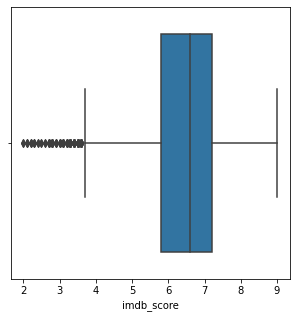

In [270]:
sns.boxplot(movie_dataset['imdb_score'])

In [259]:

outlier_test=movie_dataset


print(np.where(outlier_test['imdb_score']<2))

outlier_test['imdb_score'].describe()




(array([], dtype=int64),)


count    4993.000000
mean        6.445704
std         1.115021
min         2.000000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [261]:
test = outlier_test[(outlier_test['imdb_score']<2)].index

In [262]:
outlier_test.drop(test,inplace=True)

In [264]:
print(np.where(outlier_test['imdb_score']<2))

outlier_test['imdb_score'].describe()

(array([], dtype=int64),)


count    4993.000000
mean        6.445704
std         1.115021
min         2.000000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [265]:
test1 = outlier_test[(outlier_test['imdb_score']>9)].index

In [267]:
outlier_test.drop(test1,inplace=True)
print(np.where(outlier_test['imdb_score']>9))

outlier_test['imdb_score'].describe()

(array([], dtype=int64),)


count    4987.000000
mean        6.442370
std         1.111526
min         2.000000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.000000
Name: imdb_score, dtype: float64

<a id='assign'></a>


* What are the data types? (Only numeric and categorical)

There are 12 categorical and 16 numerical data types. Details related to all the columns can be found [here](#dtype)


* Are there missing values?

Yes, more details about missing data and cleaning it can be found [here](#missing)


* What are the likely distributions of the numeric variables?

Looks like it is deviating from normal distribution and most of the independent numeric variables seem to be left(negative) skewed. Details are in this [distribution](#distribution) section.


* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Based on the feature selection methods like Univariate, correleation matrix heatmap and feature imporatance property below are the variables ranked ordinally:
* num_voted_users
* duration
* num_critic_for_reviews
* num_user_for_reviews
* movie_facebook_likes
* gross
* budget
* title_year
* director_facebook_likes

[More details](#feature)


* Which independent variables have missing data? How much?

[Click here](#missing) to get the complete list of missing data and by how much.



* Do the training and test sets have the same data?

Yes, the training and test sets have almost the same data which can be seen using the overlapping graph that we plotted in [Training and Test data section](#traintest)


* In the predictor variables independent of all the other predictor variables?

Predictor variables does not seem to be indepedent of all the other predictor variables as few variables like gross, duration country, language and facebook likes of the movie shows multi collinearity. This can be seen from the [pairplot](#pairplot) and [correlation matrix](#correlation).



* Which predictor variables are the most important?

Based on the feature selection methods like Univariate, correleation matrix heatmap and feature imporatance property below are the predictor variables that are the most important:
* num_voted_users
* duration
* num_critic_for_reviews
* num_user_for_reviews
* movie_facebook_likes
* gross
* budget
* title_year
* director_facebook_likes


* Do the ranges of the predictor variables make sense?

Yes the range of the predictor variable does make sense after having it mapped with the target variable, we could see that the higher the imdb score, the higher the value of its predictor variable is, though there are few outliers in that range. The graph can be seen [here](#range).


* What are the distributions of the predictor variables?   

Looks like it is deviating from normal distribution and most of the independent numeric variables seem to be left(negative) skewed. Details are in this [distribution](#distribution) section.


* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Keeping and removing the outlier did not have a significant can on the target variable which can be seen in [outlier](#outlier) section as the mean of the target did not change after removing the outliers. 


* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. 

1%,5% and 10% of the data was randomly removed and imputation method was used to replace it. Missing values were replaced, rows with null values were dropped and dummy variables were used for the same. [Data Cleaning](#cleaning) shows the missing value replacement and null value rows being dropped and [Confusion Matrix](#confusion) shows the usage of dummy variables.

* How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

An accuracy of 0.64 was obtained after recovering the missing values along with a low bias and comparatively high variance was obtained. Calculation is show [here](#varbias).

* For categorical data, calculate the accuracy and a confusion matrix.

An accuracy of 0.64 was obtained using Logistic Regression. [Confusion matrix](#confusion) has the complete details.

